# 华为企业智能技术与开发课程实验一：华为云EI图像标签实现智慧相册

### 实验描述：
      本实验使用华为云EI图像识别服务，实现简单的电子相册整理功能
### 实现目的：
      通过本实验，学生将了解如何结合华为云中的图像识别服务进行图像内容标签的功能。目前华为共有云提供了图像识别的Restful API和基于Python语言的图像识别的SDK，本实验指导学生理解和掌握如何使用Python语言利用图像标签业务进行相册的智慧整理
### 作者：
      23190920赵锐博

# 2.4.6 图像标签服务初始化
## 步骤 1 引入相关的库

In [1]:
# 调用包从图像识别包中调用，图像标签,工具包
from image_sdk.utils import encode_to_base64
from image_sdk.image_tagging import image_tagging_aksk
from image_sdk.utils import init_global_env

# 调用 json 解析传回的结果
import json
# 操作系统文件/文件夹的包
import os
import shutil
# 图像处理展示相关的包
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

## 步骤 2 设置相关参数

In [2]:
init_global_env('cn-north-4')
# 准备 ak,sk

app_key = 'IYEGB5NUPFO7XBBP64EG'
app_secret = '33ZYcFq1XvopOnkzGWuIWpxzi1tCm0E0mnwJDNdy'

## 步骤 3 使用网络图像测试

In [3]:
# 使用网络图像测试
demo_data_url = 'https://p0.itc.cn/q_70/images01/20210904/71e112b0a8cb43a7bf1d6a98be28cebd.jpeg'
# call interface use the url
result = image_tagging_aksk(app_key, app_secret, '', demo_data_url, 'zh', 5, 30)
print(result)

# 将字符串类型转化成 Python 字典形式
tags = json.loads(result)
print(tags)

{"result":{"tags":[{"confidence":"99.4","i18n_tag":{"en":"Person","zh":"人"},"tag":"人","type":"object"},{"confidence":"98.63","i18n_tag":{"en":"Selfie","zh":"自拍"},"tag":"自拍","type":"concept"},{"confidence":"95.18","i18n_tag":{"en":"Woman","zh":"女人"},"tag":"女人","type":"object"},{"confidence":"93.45","i18n_tag":{"en":"Lovely","zh":"可爱"},"tag":"可爱","type":"object"},{"confidence":"90.33","i18n_tag":{"en":"Character","zh":"人物"},"tag":"人物","type":"object"}]}}

{'result': {'tags': [{'confidence': '99.4', 'i18n_tag': {'en': 'Person', 'zh': '人'}, 'tag': '人', 'type': 'object'}, {'confidence': '98.63', 'i18n_tag': {'en': 'Selfie', 'zh': '自拍'}, 'tag': '自拍', 'type': 'concept'}, {'confidence': '95.18', 'i18n_tag': {'en': 'Woman', 'zh': '女人'}, 'tag': '女人', 'type': 'object'}, {'confidence': '93.45', 'i18n_tag': {'en': 'Lovely', 'zh': '可爱'}, 'tag': '可爱', 'type': 'object'}, {'confidence': '90.33', 'i18n_tag': {'en': 'Character', 'zh': '人物'}, 'tag': '人物', 'type': 'object'}]}}


# 2.4.7 利用标签打标相关的照片
## 步骤 1 打标一张照片

In [4]:
# 确定电子相册位置
file_path ='huaweiei_AIphones/data/'
file_name = 'pic3.jpg'

# 保存图片标签的字典
labels={}
# 图像打标
result = image_tagging_aksk(app_key, app_secret, encode_to_base64(file_path + file_name), '', 'zh', 5, 
60)

# 解析结果
result_dic = json.loads(result)
# 保存到字典中
labels[file_name] = result_dic['result']['tags']
print(labels)

{'pic3.jpg': [{'confidence': '95.9', 'i18n_tag': {'en': 'Lion', 'zh': '狮子'}, 'tag': '狮子', 'type': 'object'}, {'confidence': '91.97', 'i18n_tag': {'en': 'Carnivora', 'zh': '食肉目'}, 'tag': '食肉目', 'type': 'object'}, {'confidence': '87.27', 'i18n_tag': {'en': 'Cat', 'zh': '猫'}, 'tag': '猫', 'type': 'object'}, {'confidence': '86.89', 'i18n_tag': {'en': 'Animal', 'zh': '动物'}, 'tag': '动物', 'type': 'object'}, {'confidence': '74.74', 'i18n_tag': {'en': 'Hairy', 'zh': '毛茸茸'}, 'tag': '毛茸茸', 'type': 'object'}]}


## 步骤 2 打标 data 文件夹下的所有照片

In [5]:
# 确定电子相册位置
file_path ='huaweiei_AIphones/data/'
# 保存图片标签的字典
labels = {}

items = os.listdir(file_path)
for i in items:
    # 判断是否为文件，而不是文件夹
    if os.path.isfile:
        # 华为云 EI 目前支持 JPG/PNG/BMP 格式的图片
        if i.endswith('jpg') or i.endswith('jpeg') or i.endswith('bmp') or i.endswith('png'):
            # 为图片打上标签
            result = image_tagging_aksk(app_key, app_secret, encode_to_base64(file_path + i),'','zh', 5,60)
            # 解析返回的结果
            result_dic = json.loads(result)
            # 将文件名与图片对齐
            labels[i] = result_dic['result']['tags']
# 显示结果
print(labels)

{'pic1.jpg': [{'confidence': '89.72', 'i18n_tag': {'en': 'Running', 'zh': '奔跑'}, 'tag': '奔跑', 'type': 'object'}, {'confidence': '87.54', 'i18n_tag': {'en': 'Motion', 'zh': '运动'}, 'tag': '运动', 'type': 'object'}, {'confidence': '87.14', 'i18n_tag': {'en': 'Sunrise', 'zh': '日出'}, 'tag': '日出', 'type': 'object'}, {'confidence': '86.66', 'i18n_tag': {'en': 'Person', 'zh': '人'}, 'tag': '人', 'type': 'object'}, {'confidence': '83.75', 'i18n_tag': {'en': 'Outdoors', 'zh': '户外'}, 'tag': '户外', 'type': 'object'}], 'pic10.jpg': [{'confidence': '85.93', 'i18n_tag': {'en': 'Flower', 'zh': '花朵'}, 'tag': '花朵', 'type': 'object'}, {'confidence': '84.4', 'i18n_tag': {'en': 'Plant', 'zh': '植物'}, 'tag': '植物', 'type': 'object'}, {'confidence': '83.58', 'i18n_tag': {'en': 'Red', 'zh': '红色'}, 'tag': '红色', 'type': 'object'}, {'confidence': '79.96', 'i18n_tag': {'en': 'Flower', 'zh': '花'}, 'tag': '花', 'type': 'object'}, {'confidence': '78.74', 'i18n_tag': {'en': 'Flowers and plants', 'zh': '花卉'}, 'tag': '花卉', 'ty

## 步骤 3 保存打标结果

In [6]:
#将标签字典保存到文件
save_path = './huaweiei_AIphones/label'
# 如果文件夹不存在则创建文件
if not os.path.exists(save_path):
    os.mkdir(save_path)
    
# 创建文件,执行写入操作，并关闭
with open(save_path + '/labels.json', 'w+') as f:
    f.write(json.dumps(labels))

# 2.4.8 利用打标结果制作动态相册
## 步骤 1 重新打开保存的标注结果

In [7]:
# 打开刚刚保存的文件
label_path = './huaweiei_AIphones/label/labels.json'
with open(label_path,'r') as f:
    labels = json.load(f)

## 步骤 2 利用关键字进行搜索（这里使用了‘花’作为关键字）

In [8]:
# 搜索关键词
key_word = input('请输入搜索词')
# 设置可信百分比
threshold = 60
# 设置一个集合（集合内只存在唯一的元素）
valid_list = set()

# 遍历 labels 中的字典获取所有包含关键字的图片名字
for k,v in labels.items():
    for item in v:
        if key_word in item['tag'] and float(item['confidence']) >= threshold:
            valid_list.add(k)
            
# 展示结果
valid_list = list(valid_list)
print(valid_list)

请输入搜索词花
['pic7.jpg', 'pic5.jpg', 'pic10.jpg', 'pic9.jpg']


## 步骤 3 展示相关的图片

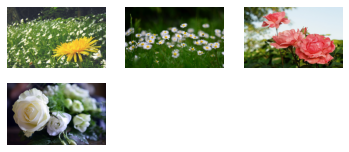

In [9]:
# 设置画布大小
plt.figure(24)

# 将每张图片依次排列到画布上
for k,v in enumerate(valid_list[:9]):
    pic_path = 'huaweiei_AIphones/data/' + v
    img = Image.open(pic_path)
    img = img.resize((640,400))
    plt.subplot(331 + k)
    plt.axis('off')
    plt.imshow(img)
    
plt.show()

## 步骤 4 制作 gif 图片

In [10]:
# 生成一个临时文件夹
if not os.path.exists('tmp'):
    os.mkdir('tmp')
    
# 将所有搜索到的图像转化为 gif 格式，并存储在临时文件夹中
gif_list = []
for k, pic in enumerate(valid_list):
    pic_path = 'huaweiei_AIphones/data/' + pic
    img = Image.open(pic_path)
    img = img.resize((640,380))
    save_name = 'tmp/'+ str(k) + '.gif'
    img.save(save_name)
    gif_list.append(save_name)
    
# 打开已经所有静止的 gif 图片
images=[]
for i in gif_list:
    pic_path = i
    images.append(Image.open(pic_path))

# 存储成动图 gif
images[0].save('相册动图.gif',save_all=True,append_images=images[1:],duration=1000,loop=0)

# 释放内存
del images
# 删除临时文件夹
shutil.rmtree('tmp')
print('gif 相册制作完成')

gif 相册制作完成


# 2.4.9 利用标签对照片进行自动分类
## 步骤 1 自动分类

In [11]:
# 打开保存的 labels 文件
label_path = 'huaweiei_AIphones/label/labels.json'
with open(label_path,'r') as f:
    labels = json.load(f)
print(labels)

# 获取置信度最高的文件分类
classes =[[v[0]['tag'],k] for k, v in labels.items()]
classes

for cls in classes:
    if not os.path.exists('huaweiei_AIphones/data/' + cls[0]):
        os.mkdir('huaweiei_AIphones/data/'+ cls[0])
    # 复制被对应的图片
    shutil.copy('huaweiei_AIphones/data/'+ cls[1], 'huaweiei_AIphones/data/'+ cls[0]+ '/' + cls[1])
    
print('已完成移复制!')

{'pic1.jpg': [{'confidence': '89.72', 'i18n_tag': {'en': 'Running', 'zh': '奔跑'}, 'tag': '奔跑', 'type': 'object'}, {'confidence': '87.54', 'i18n_tag': {'en': 'Motion', 'zh': '运动'}, 'tag': '运动', 'type': 'object'}, {'confidence': '87.14', 'i18n_tag': {'en': 'Sunrise', 'zh': '日出'}, 'tag': '日出', 'type': 'object'}, {'confidence': '86.66', 'i18n_tag': {'en': 'Person', 'zh': '人'}, 'tag': '人', 'type': 'object'}, {'confidence': '83.75', 'i18n_tag': {'en': 'Outdoors', 'zh': '户外'}, 'tag': '户外', 'type': 'object'}], 'pic10.jpg': [{'confidence': '85.93', 'i18n_tag': {'en': 'Flower', 'zh': '花朵'}, 'tag': '花朵', 'type': 'object'}, {'confidence': '84.4', 'i18n_tag': {'en': 'Plant', 'zh': '植物'}, 'tag': '植物', 'type': 'object'}, {'confidence': '83.58', 'i18n_tag': {'en': 'Red', 'zh': '红色'}, 'tag': '红色', 'type': 'object'}, {'confidence': '79.96', 'i18n_tag': {'en': 'Flower', 'zh': '花'}, 'tag': '花', 'type': 'object'}, {'confidence': '78.74', 'i18n_tag': {'en': 'Flowers and plants', 'zh': '花卉'}, 'tag': '花卉', 'ty